In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
by_game_df = pd.read_excel('By Game diffs and sums.xlsx')

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

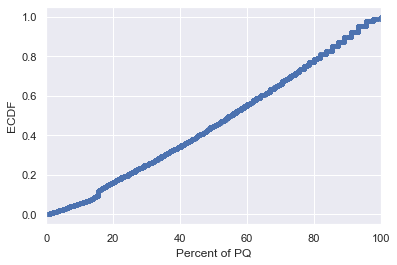

In [4]:
x_pq, y_pq = ecdf(by_game_df['PQ'])

# Generate plot
plt.plot(x_pq,y_pq, marker = '.', linestyle = 'none')

# Label the axes
plt.xlabel('Percent of PQ')
plt.ylabel('ECDF')
plt.xlim(0, 100)
plt.show()

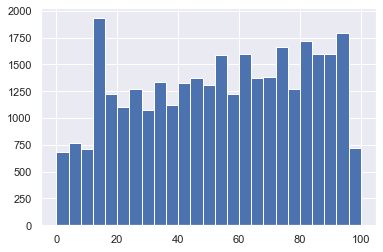

In [5]:
plt.hist(by_game_df['PQ'], bins = 25)
plt.show()

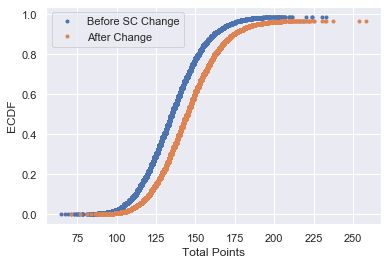

In [6]:
before = by_game_df[by_game_df['Year'] < 15]
after = by_game_df[by_game_df['Year'] > 14]
x_before_pts, y_before_pts = ecdf(before['Final_total'])
x_after_pts, y_after_pts = ecdf(after['Final_total'])
_ = plt.plot(x_before_pts, y_before_pts, marker = '.', linestyle = 'none')
_ = plt.plot(x_after_pts, y_after_pts, marker = '.', linestyle = 'none')
plt.legend(('Before SC Change', 'After Change'), loc= 'upper left')
plt.xlabel('Total Points')
plt.ylabel('ECDF')
plt.show()

In [7]:
by_team = pd.read_excel('All Data Clean Rd3.xlsx')

In [8]:
def before_after(year):
    if year < 15:
        return 'Before'
    else:
        return 'After'
by_game_df['SC Change'] =by_game_df['Year'].apply(before_after)

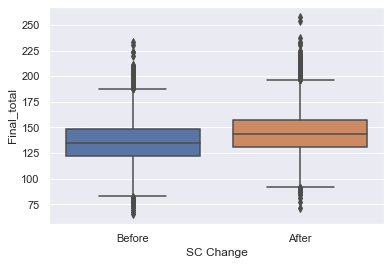

In [9]:
sns.boxplot(x = 'SC Change', y = 'Final_total', data= by_game_df)

In [10]:
print(np.std(before['Final_diff']))
print(np.std(after['Final_diff']))

8.49737327006304
8.998745611285662


In [11]:
by_game_na_dropped = by_game_df.dropna()

In [12]:
def pearson_r(x,y):
    return np.corrcoef(x,y)[0,1]

In [13]:
np.corrcoef(by_game_na_dropped['Final_diff'], by_game_na_dropped['PQ'])[0,1]

-0.3724803075395519

In [14]:
np.corrcoef(by_game_na_dropped['SOS_diff'], by_game_na_dropped['PQ'])[0,1]

-0.35420280915601104

In [15]:
np.corrcoef(by_game_na_dropped['FGA_total'], by_game_na_dropped['PQ'])[0,1]

-0.0103330673505593

In [16]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number


        # If less than p, it's a success so add one to n_success
        if np.random.random() < p:
            n_success += 1

    return n_success

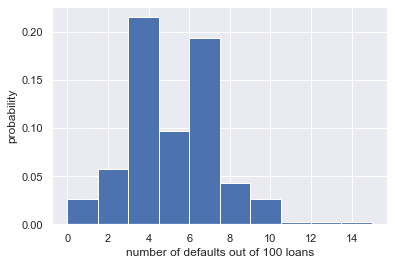

In [17]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

(array([  2.,   3.,  25.,  68., 166., 269., 249., 262., 206., 146., 120.,
         74.,  58.,  35.,   5.]),
 array([-26.82      , -23.11733333, -19.41466667, -15.712     ,
        -12.00933333,  -8.30666667,  -4.604     ,  -0.90133333,
          2.80133333,   6.504     ,  10.20666667,  13.90933333,
         17.612     ,  21.31466667,  25.01733333,  28.72      ]),
 <a list of 15 Patch objects>)

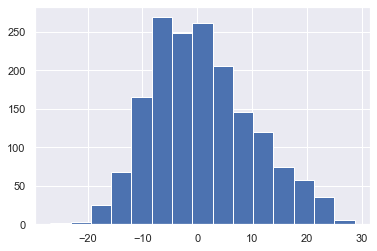

In [18]:
plt.hist(by_team['SRS'], bins= 15)

In [19]:
high_pq_bool = by_game_df['PQ']  > 95
games_between_high_pq = []
g_count = 1
for hpb in high_pq_bool:
    if hpb:
        games_between_high_pq.append(g_count)
        g_count = 1
    else:
        g_count += 1
len(games_between_high_pq)


1512

/Users/stevenkerr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


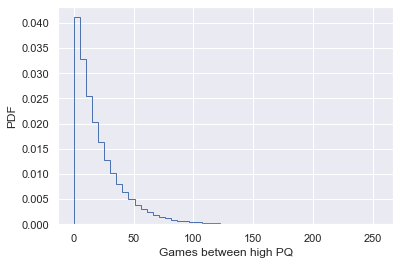

In [20]:
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(games_between_high_pq)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_highp = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_highp,
             bins=50, density = True, histtype = 'step')
_ = plt.xlabel('Games between high PQ')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


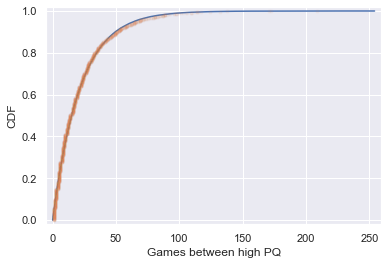

In [21]:
# Create an ECDF from real data: x, y
x, y = ecdf(games_between_high_pq)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_highp)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none', alpha = .05)
# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between high PQ')
plt.ylabel('CDF')

# Show the plot
plt.show()

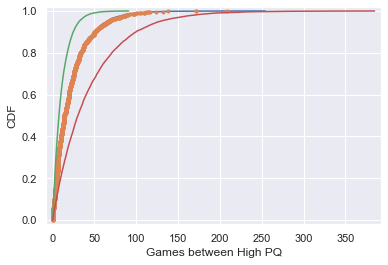

In [22]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between High PQ')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double =  np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

slope = -2.9215196511161174
intercept = 77.17236879391493
Pearson:  -0.68330049075937


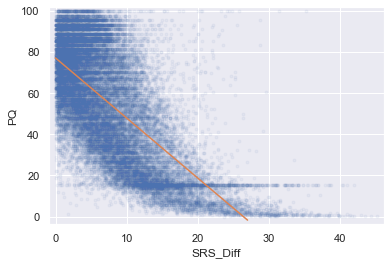

In [33]:
_ = plt.plot(by_game_na_dropped['SRS_diff'],by_game_na_dropped['PQ'], marker='.', linestyle='none' , alpha = .05)
plt.margins(0.02)
_ = plt.xlabel('SRS_Diff')
_ = plt.ylabel('PQ')

a, b = np.polyfit(by_game_na_dropped['SRS_diff'],by_game_na_dropped['PQ'],1)

print('slope =', a)
print('intercept =', b)
print("Pearson: ", pearson_r(by_game_na_dropped['SRS_diff'], by_game_na_dropped['PQ']))

x = np.array([0,27])
y = a*x + b 

_ = plt.plot(x, y)

# Draw the plot
plt.show()

/Users/stevenkerr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([1777., 3274., 2795., 2871., 3233., 3344., 3576., 3695., 4121.,
        3312.]),
 array([3.99928013e-02, 1.00359935e+01, 2.00319942e+01, 3.00279950e+01,
        4.00239957e+01, 5.00199964e+01, 6.00159971e+01, 7.00119978e+01,
        8.00079986e+01, 9.00039993e+01, 1.00000000e+02]),
 <a list of 10 Patch objects>)

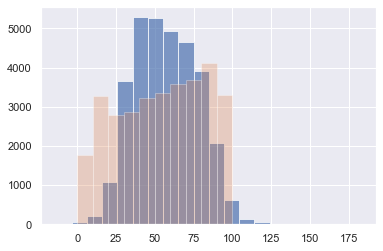

In [34]:
by_game_na_dropped['PQ adjusted'] = by_game_na_dropped['PQ'] + (by_game_na_dropped['SRS_diff'] * 2.92) - 20
plt.hist(by_game_na_dropped['PQ adjusted'], bins =20, alpha = .7)
plt.hist(by_game_na_dropped['PQ'], alpha = .3)